In [1]:
# Local files
import pyClient
from pyClient import Environment
import utils


# OpenCV, numpy, matplotlib etc. 
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.animation

### Environment

Connect to the unity hallway environment.

#### Attention: Start Unity server first!

In [2]:
# Unity environment
ip         = "127.0.0.1" # Ip address that the TCP/IP interface listens to
port       = 13000       # Port number that the TCP/IP interface listens to
size       = 128
screen_height = screen_width = size

environment = pyClient.Environment(ip = ip, port = port, size = size)

print(environment.client)

<socket.socket fd=1952, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 57336), raddr=('127.0.0.1', 13000)>


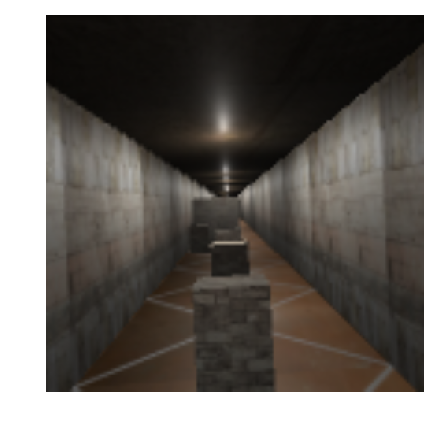

In [3]:
# Reset environment
end, reward, state_raw = environment.reset()

# display current state (128x128 image)
img = environment.state2arrays(state_raw)['colors']
img = cv2.resize(img, (480,480))

plt.figure(figsize=(5,5),dpi=100)
plt.imshow(img)
plt.axis('off')
plt.show()


In [4]:
plt.imshow(state_raw[:,:,5])

TypeError: list indices must be integers or slices, not tuple

In [ ]:
state_raw[...,3:6].shape

In [ ]:
import matplotlib
%matplotlib notebook

f = plt.figure()
ax = f.gca()

im = environment.state2usableArray(state_raw)
image = plt.imshow(im, interpolation='None', animated=True)
plt.axis('off')

def animateSteps(frame_index):
    # Take a step 0:forward 1:left 2:right
    command = np.random.randint(3)
    end, reward, state_raw = environment.step(command)
    reward = -reward + 100 if reward > 100 else reward
    im = environment.state2usableArray(state_raw)
    
    # update frame
    image.set_data(im)
    ax.set_title('Reward: {}'.format(reward))
    return image,

ani = matplotlib.animation.FuncAnimation(f, animateSteps, interval=500, frames=10, blit=True)

## Phosphene Simulator

In [ ]:
RESOLUTION    = (50,50) # Number of phosphenes
JITTER        = 0.35    # Variation in phosphene location (w.r.t. rectangular grid)
INTENSITY_VAR = 0.9     # Variation in phosphene intensity
SIGMA         = 0.9     # Size parameter for the individual phosphenes 

phosphene_simulator = utils.PhospheneSimulator(phosphene_resolution=RESOLUTION,
                                               jitter=JITTER,
                                               intensity_var=INTENSITY_VAR,
                                               sigma=SIGMA)


# Activation masks
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
binarized = (255*(grayscale>100)).astype('uint8')
contours  = cv2.Canny(img, 35,70)



# Visualize
plt.figure(figsize=(15,5),dpi=150)

plt.subplot(1,3,1)
phos = phosphene_simulator(grayscale)
plt.imshow(phos, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
phos = phosphene_simulator(binarized)
plt.imshow(phos, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
phos = phosphene_simulator(contours)
plt.imshow(phos, cmap='gray')
plt.axis('off')


plt.show()